# Original Model Replication

The goal here is to get an agent which is as close as possible to the original model, to see how well it replicates prior results.

This variant adds the reneg-on-accepted-offers behavior

In [1]:
import copy

from negotiation_model import *
from bdm_agent import *
from bdm_replication import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Cluster setup

In [2]:
import ipyparallel

In [3]:
clients = ipyparallel.Client()
clients.ids

[0, 1, 2, 3]

In [4]:
dview = clients[:]

In [5]:
with dview.sync_imports():
    import copy


importing copy on engine(s)


# Model Setup

## EU Standards Model

In [6]:
Netherlands = BDMActor('Netherlands', 0.08, 4, 0.8)
Belgium = BDMActor('Belgium', 0.08, 7, 0.4)
Luxembourg = BDMActor('Luxembourg', 0.03, 4, 0.2)
Germany = BDMActor('Germany', 0.16, 4, 0.8)
France = BDMActor('France', 0.16, 10, 0.6)
Italy = BDMActor('Italy', 0.16, 10, 0.6)
UK = BDMActor('UK', 0.16, 10, 0.9)
Ireland = BDMActor('Ireland', 0.05, 7, 0.1)
Denmark = BDMActor('Denmark', 0.05, 4, 1)
Greece = BDMActor('Greece', 0.08, 7, 0.7)

agents = [Netherlands, Belgium, Luxembourg, Germany, France, 
          Italy, UK, Ireland, Denmark, Greece]

# Normalize positions
for agent in agents:
    agent.position = (agent.position - 4) / 6
    #agent.decision_model.verbose = True
    agent.decision_model.Q = 0.5
    agent.decision_model.T = 1

model = Real_Negotiation_Model(agents)

In [7]:
dview.push({"model": model})

<AsyncResult: _push>

In [8]:
def run_model(m):
    m.run_model(10)
    return m

In [10]:
model_runs = dview.map_sync(run_model, [copy.deepcopy(model) for _ in range(4)])

In [11]:
all_dfs = []
for i, m in enumerate(model_runs):
    df = m.datacollector.get_model_vars_dataframe()
    df = df.reset_index().rename(columns={"index": "Step"})
    df["Iteration"] = i
    all_dfs.append(df)
df = pd.concat(all_dfs)

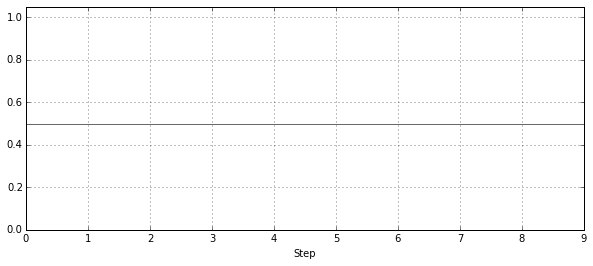

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
for i, group in df.groupby("Iteration"):
    group.plot(x="Step", y="Median", color='k', alpha=0.2, ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.grid(True)

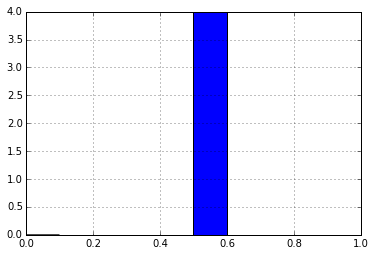

In [13]:
df[df.Step==9]["Median"].hist()

In [14]:
df

,Step,Mean,Median,Iteration
0,0,0.564993,0.5,0
1,1,0.654937,0.5,0
2,2,0.701505,0.5,0
3,3,0.711574,0.5,0
4,4,0.723489,0.5,0
5,5,0.735769,0.5,0
6,6,0.742095,0.5,0
7,7,0.744833,0.5,0
8,8,0.746919,0.5,0
9,9,0.747667,0.5,0
